# Lab1 (Student version)
## Students:
## Jack Thay - 21201079
## Thierry Ung - 3804472

We can use the following libraries.

In [1]:
import matplotlib.pyplot as plt
import math
import sys
print(sys.version)

3.8.6 (tags/v3.8.6:db45529, Sep 23 2020, 15:52:53) [MSC v.1927 64 bit (AMD64)]


## Exercise 1: getting things started with undirected graphs

### Question 1

Create manually an undirected graph (with approximately a dozen nodes) _test_graph.txt_ and store it in a text file in the format (for each line):

x    y 

Where x and y are separated with a tabulation. You will use them to test your codes.

### Question 2

Download the following graphs (be careful these datasets are quite heavy):

http://snap.stanford.edu/data/com-Amazon.html

http://snap.stanford.edu/data/com-LiveJournal.html

Also, download _graph.txt_ and _bugged_graph.txt_ from https://moodle-sciences-23.sorbonne-universite.fr

These datasets allow you to check the results of your programs.


### Question 3

Make a program which reads a graph from a text file and counts the number of nodes and edges in a graph (without storing the graph in memory). 

In [2]:
def count_nodes_edges(filename):
    # Initialize an empty set to store unique nodes
    nodes = set()
    # Initialize a variable to count the number of edges
    edges = 0

    # Open the specified file in read ('r') mode
    with open(filename, 'r') as file:
        # Iterate through each line in the file
        for line in file:
            # Remove leading and trailing whitespace and split the line into parts
            edge_info = line.strip().split()
            # Check if the line does not contain exactly two values (node identifiers)
            if len(edge_info) != 2:
                # Skip lines that don't have two values
                continue
            # Add both node identifiers to the 'nodes' set
            nodes.update(edge_info)
            # Increment the edge count
            edges += 1

    # Calculate the number of unique nodes by finding the length of the 'nodes' set
    num_nodes = len(nodes)
    # The total number of edges has already been counted in the 'edges' variable
    num_edges = edges

    # Return the counts of nodes and edges as a tuple
    return num_nodes, num_edges

In [3]:
filename = 'test_graph.txt'
num_nodes, num_edges = count_nodes_edges(filename)
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
# Answer should be 16 nodes and 15 edges

Number of nodes: 16
Number of edges: 15


In [4]:
filename = 'graph.txt'
num_nodes, num_edges = count_nodes_edges(filename)
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
# Answer should be 10 nodes and 15 edges

Number of nodes: 10
Number of edges: 15


### Question 3bis

Apply the previous code to _bugged_graph.txt_ and then look at the content of the file. Does it correspond to the expected result? Explain in one sentence what the problem is.

In [5]:
filename = 'bugged_graph.txt'
num_nodes, num_edges = count_nodes_edges(filename)
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
# Answer should be 10 nodes and 18 edges

Number of nodes: 10
Number of edges: 18


Answer :    
     
The code in its current form has a limitation: it does not accurately count the number of edges because it doesn't detect redundant links. If the same link appears multiple times in the input file, the function will count it as a separate edge each time, leading to an incorrect count of edges in the output. In other words, redundant links are not being deduplicated or recognized, resulting in an inaccurate edge count.

### Question 4

Make a program which counts the degree (i.e. the number of edges) of a node of a graph (without storing it in memory).

In [6]:
def count_node_degree(filename, target_node):
    # Initialize a variable to count the degree of the target node
    degree = 0

    # Open the specified file in read ('r') mode
    with open(filename, 'r') as file:
        # Iterate through each line in the file
        for line in file:
            # Remove leading and trailing whitespace from the line
            line = line.strip()
            # Check if the line is not empty
            if line:
                # Split the line into parts based on whitespace
                edge_info = line.split()
                # Check if the target node is in the list of node identifiers in the line
                if target_node in edge_info:
                    # Increment the degree count if the target node is found
                    degree += 1

    # Return the degree of the target node
    return degree

In [7]:
filename = 'test_graph.txt'
target_node = '0'
node_degree = count_node_degree(filename, target_node)
print(f"Degree of node {target_node} : {node_degree}")
# Answer should be 0 for node 0

Degree of node 0 : 0


In [8]:
filename = 'graph.txt'
target_node = '2'
node_degree = count_node_degree(filename, target_node)
print(f"Degree of node {target_node} : {node_degree}")
# Answer should be 3 for node 2

Degree of node 2 : 3


In [9]:
filename = 'bugged_graph.txt'
target_node = '4'
node_degree = count_node_degree(filename, target_node)
print(f"Degree of node {target_node} : {node_degree}")
# Answer should be 6 for node 4

Degree of node 4 : 6


## Exercise 2: loading a graph in memory

### Question 5

Make a program which reads a graph from a text file and load it as a python **dictionary of lists**. 
This implementation of the adjacency list format will be the standard format that we will use to store a graph in this course.

In [10]:
def load_graph(filename):
    # Initialize an empty dictionary to represent the adjacency list
    adjacency_list = {}
    
    # Open the specified file in read ('r') mode
    with open(filename, 'r') as file:
        # Iterate through each line in the file
        for line in file:
            # Remove leading and trailing whitespace from the line
            line = line.strip()
            # Check if the line is not empty
            if not line:
                continue  # Skip empty lines
            # Split the line into two nodes, assuming it represents an edge
            node1, node2 = line.split()
            # Use setdefault to initialize the lists for node1 and node2 if they don't exist
            adjacency_list.setdefault(node1, []).append(node2)
            adjacency_list.setdefault(node2, []).append(node1)

    # Return the adjacency list representing the loaded graph
    return adjacency_list

In [11]:
filename = 'test_graph.txt'
dictionary = load_graph(filename)
print(dictionary)

{'2': ['1'], '1': ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16'], '3': ['1'], '4': ['1'], '5': ['1'], '6': ['1'], '7': ['1'], '8': ['1'], '9': ['1'], '10': ['1'], '11': ['1'], '12': ['1'], '13': ['1'], '14': ['1'], '15': ['1'], '16': ['1']}


In [12]:
filename = 'graph.txt'
dictionary = load_graph(filename)
print(dictionary)

{'0': ['1', '2'], '1': ['0', '3', '4', '7'], '2': ['0', '3', '5'], '3': ['1', '2', '4'], '4': ['1', '3', '6', '8'], '7': ['1', '9', '5'], '5': ['2', '8', '7'], '6': ['4', '9'], '8': ['4', '5', '9'], '9': ['7', '6', '8']}


In [13]:
filename = 'bugged_graph.txt'
dictionary = load_graph(filename)
print(dictionary)

{'0': ['1', '2', '2'], '1': ['0', '3', '4', '7'], '2': ['0', '0', '3', '5'], '3': ['1', '2', '4'], '4': ['1', '3', '6', '4', '4', '6', '8'], '7': ['1', '5', '9'], '5': ['2', '8', '7'], '6': ['4', '4', '9'], '8': ['4', '5', '9'], '9': ['6', '7', '8']}


### Question 6

Make a program that deletes the self-loops and duplicated edges existing in the graph and writes it in a new text file. 

Use it on _bugged_graph.txt_ to create a graph _clean_graph.txt_ without self-loops and duplicated edges.

In [14]:
def clean_graph(input_filename, output_filename):
    # Initialize an empty set to store the cleaned edges.
    cleaned_edges = set()
    
    # Open the input file in read ('r') mode.
    with open(input_filename, 'r') as file:
        # Iterate through each line in the file.
        for line in file:
            # Remove leading and trailing whitespace from the line and skip empty lines.
            if line.strip():
                # Split the line into two node identifiers, assuming it represents an edge.
                edge_info = line.strip().split()
                node1, node2 = edge_info[0], edge_info[1]
                # Ensure that node1 and node2 are ordered numerically to avoid duplicates.
                node1, node2 = sorted([node1, node2])
                # Check if the edge is not a self-loop.
                if node1 != node2:
                    # Add the cleaned edge (ordered nodes) to the set.
                    cleaned_edges.add((node1, node2))

    # Open the output file in write ('w') mode.
    with open(output_filename, 'w') as output_file:
        # Iterate through the sorted cleaned edges.
        for edge in sorted(cleaned_edges):
            # Write the cleaned edge (ordered nodes) to the output file.
            output_file.write(f"{edge[0]} {edge[1]}\n")

In [15]:
input_filename = 'bugged_graph.txt'
output_filename = 'clean_graph.txt'
clean_graph(input_filename, output_filename)
print("Self-loops and duplicated edges removed. Cleaned graph written to", output_filename)

Self-loops and duplicated edges removed. Cleaned graph written to clean_graph.txt


In [16]:
filename = 'clean_graph.txt'
num_nodes, num_edges = count_nodes_edges(filename)
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
# Answer should be 10 nodes and 15 edges

Number of nodes: 10
Number of edges: 15


In [17]:
filename = 'clean_graph.txt'
target_node = '4'
node_degree = count_node_degree(filename, target_node)
print(f"Degree of node {target_node} : {node_degree}")
# Answer should be 4 for node 4

Degree of node 4 : 4


### Question 7

Try the data structure of Question 5 on the two graphs downloaded in Question 2, can you load them in memory? Can you print them on the screen?

Conclude on the scalability (meaning what graph size can you handle with this data structure).

## Exercise 3: degree distribution

### Question 8
Create a program which computes the degree distribution of a graph, store it in a python dictionary of the form:

deg: number of occurrences

In [18]:
def compute_degree_distribution(adjacency_list):
    # Initialize an empty dictionary to store the degree distribution.
    degree_distribution = {}
    
    # Iterate through each node in the adjacency list along with its neighbors.
    for node, neighbors in adjacency_list.items():
        # Calculate the degree of the current node by finding the number of its neighbors.
        degree = len(neighbors)
        # Check if the degree already exists as a key in the degree_distribution dictionary.
        if degree in degree_distribution:
            # If it exists, increment the count for that degree by 1.
            degree_distribution[degree] += 1
        else:
            # If it doesn't exist, add it to the degree_distribution dictionary with a count of 1.
            degree_distribution[degree] = 1
    
    # Return the degree_distribution dictionary, which represents the degree distribution of nodes
    # in the input graph, where keys are degrees, and values are the number of nodes with that degree.
    return degree_distribution

In [19]:
adjacency_list = load_graph('test_graph.txt')
degree_distribution = compute_degree_distribution(adjacency_list)
print(degree_distribution)

{1: 15, 15: 1}


In [20]:
adjacency_list = load_graph('graph.txt')
degree_distribution = compute_degree_distribution(adjacency_list)
print(degree_distribution)

{2: 2, 4: 2, 3: 6}


In [21]:
adjacency_list = load_graph('bugged_graph.txt')
degree_distribution = compute_degree_distribution(adjacency_list)
print(degree_distribution)

{3: 7, 4: 2, 7: 1}


In [22]:
adjacency_list = load_graph('clean_graph.txt')
degree_distribution = compute_degree_distribution(adjacency_list)
print(degree_distribution)

{2: 2, 4: 2, 3: 6}


### Question 9

Plot the degree distribution in logarithmic scale (using matplotlib for example). Be careful to choose an adequate plotting style.

In [23]:
def plot_degree_distribution(adjacency_list):
    # Calculate the degree distribution using the compute_degree_distribution function.
    degree_distribution = compute_degree_distribution(adjacency_list)
    # Create a new figure for the plot with specified dimensions.
    plt.figure(figsize=(10, 6))
    # Create a bar plot where x-values are degrees, and y-values are the corresponding counts.
    plt.bar(degree_distribution.keys(), degree_distribution.values(), color='skyblue')
    # Set the y-axis to a logarithmic scale for better visualization.
    plt.yscale('log')
    # Set the x-axis to a logarithmic scale for better visualization.
    plt.xscale('log')
    # Label the x-axis as 'Degree'.
    plt.xlabel('Degree')
    # Label the y-axis as 'Number of Nodes (log scale)'.
    plt.ylabel('Number of Nodes (log scale)')
    # Set the title of the plot as 'Degree Distribution'.
    plt.title('Degree Distribution')
    # Add grid lines to both x and y axes with a dashed line style and thin linewidth.
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    # Display the plot.
    plt.show()

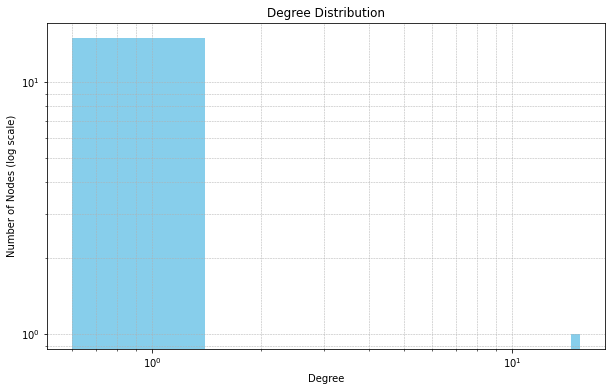

In [24]:
adjacency_list = load_graph('test_graph.txt')
plot_degree_distribution(adjacency_list)

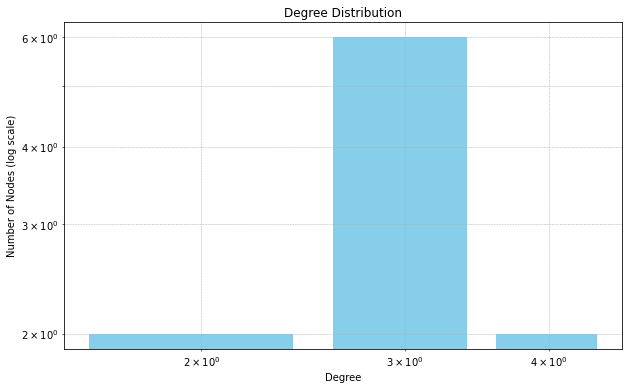

In [25]:
adjacency_list = load_graph('graph.txt')
plot_degree_distribution(adjacency_list)

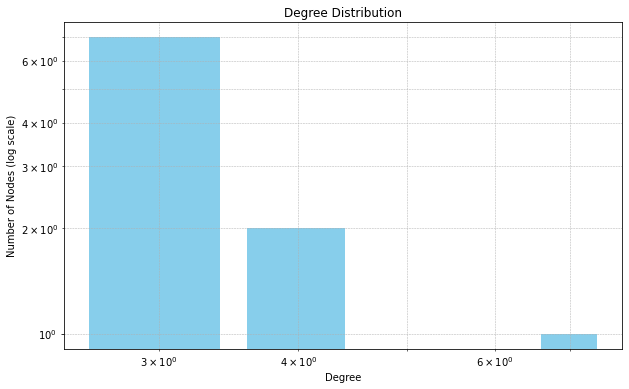

In [26]:
adjacency_list = load_graph('bugged_graph.txt')
plot_degree_distribution(adjacency_list)

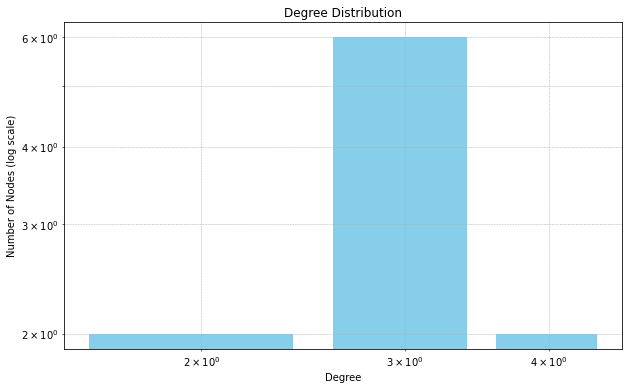

In [27]:
adjacency_list = load_graph('clean_graph.txt')
plot_degree_distribution(adjacency_list)

## Exercise 3: the case of directed graphs

### Question 10

Download the following directed graph:

http://konect.cc/networks/web-Google/

By adapting your codes for undirected graphs to directed graphs, load it in memory into a double ajacency list format.

In [28]:
def load_directed_graph(filename):
    # Initialize two empty dictionaries to represent adjacency lists.
    adjacency_list = {}          # For the original graph
    reverse_adjacency_list = {}  # For the reverse graph

    # Open the specified file in read ('r') mode.
    with open(filename, 'r') as file:
        # Iterate through each line in the file.
        for line in file:
            # Remove leading and trailing whitespace from the line.
            line = line.strip()
            # Check if the line is empty, and if so, skip it.
            if not line:
                # Skip empty lines
                continue
            # Split the line into two node identifiers, assuming it represents a directed edge.
            node1, node2 = line.split()
            # Use setdefault to initialize lists for node1 and node2 in both adjacency lists
            # if they don't already exist, and then append the appropriate nodes to represent the edges.
            adjacency_list.setdefault(node1, []).append(node2)                # Original graph
            reverse_adjacency_list.setdefault(node2, []).append(node1)        # Reverse graph

    # Return both adjacency lists, one for the original graph and one for the reverse graph.
    return adjacency_list, reverse_adjacency_list

In [29]:
filename = 'web-Google.txt'
dictionary = load_directed_graph(filename)
#print(dictionary)

### Question 11

Plot in log-log scale both the in-degree distribution and the out-degree distribution of this graph.

In [30]:
def compute_degree_distribution_directed(adjacency_list, reverse_adjacency_list):
    # Initialize two empty dictionaries to store degree distributions.
    in_degree_distribution = {}   # For in-degrees
    out_degree_distribution = {}  # For out-degrees

    # Compute out-degree distribution.
    for node, out_neighbors in adjacency_list.items():
        # Calculate the out-degree of the current node by finding the number of outgoing edges.
        out_degree = len(out_neighbors)
        # Check if the out-degree already exists as a key in the out_degree_distribution dictionary.
        if out_degree in out_degree_distribution:
            # If it exists, increment the count for that out-degree by 1.
            out_degree_distribution[out_degree] += 1
        else:
            # If it doesn't exist, add it to the out_degree_distribution dictionary with a count of 1.
            out_degree_distribution[out_degree] = 1

    # Compute in-degree distribution.
    for node, in_neighbors in reverse_adjacency_list.items():
        # Calculate the in-degree of the current node by finding the number of incoming edges.
        in_degree = len(in_neighbors)
        # Check if the in-degree already exists as a key in the in_degree_distribution dictionary.
        if in_degree in in_degree_distribution:
            # If it exists, increment the count for that in-degree by 1.
            in_degree_distribution[in_degree] += 1
        else:
            # If it doesn't exist, add it to the in_degree_distribution dictionary with a count of 1.
            in_degree_distribution[in_degree] = 1

    # Return both in-degree and out-degree distributions as dictionaries.
    return in_degree_distribution, out_degree_distribution

In [31]:
filename = 'web-Google.txt'
adj_list, reverse_adj_list = load_directed_graph(filename)
in_degree_dist, out_degree_dist = compute_degree_distribution_directed(adj_list, reverse_adj_list)
print("\nIn-Degree Distribution:")
print(in_degree_dist)
print("\nOut-Degree Distribution:")
print(out_degree_dist)


In-Degree Distribution:
{200: 13, 4: 36633, 208: 16, 206: 29, 212: 11, 22: 2234, 75: 136, 9: 14154, 13: 7552, 2: 114542, 21: 2859, 5: 27869, 6: 23752, 1158: 1, 2496: 1, 58: 264, 29: 1231, 20: 3744, 40: 572, 3: 58863, 61: 210, 1: 286895, 11: 10037, 96: 62, 103: 75, 2042: 1, 95: 84, 97: 72, 99: 90, 7: 19255, 18: 4858, 25: 1604, 33: 845, 31: 1077, 17: 5230, 10: 11523, 23: 2001, 159: 17, 55: 294, 106: 84, 15: 6207, 24: 1885, 14: 6768, 105: 70, 44: 545, 5354: 1, 47: 391, 51: 324, 516: 1, 156: 19, 56: 253, 104: 43, 78: 147, 53: 404, 543: 1, 187: 10, 3988: 1, 229: 6, 86: 70, 12: 8739, 37: 782, 27: 1446, 399: 1, 102: 52, 299: 6, 8: 15987, 182: 25, 35: 869, 124: 31, 45: 489, 52: 344, 30: 1137, 3370: 1, 19: 4230, 48: 346, 34: 866, 32: 932, 126: 32, 16: 5726, 28: 1293, 88: 84, 71: 176, 36: 906, 38: 711, 216: 1, 189: 14, 83: 74, 26: 1630, 147: 24, 60: 224, 1955: 1, 415: 4, 116: 44, 161: 14, 160: 24, 158: 13, 157: 24, 57: 261, 386: 1, 3810: 1, 175: 11, 125: 36, 79: 97, 87: 102, 110: 36, 82: 132, 4

In [32]:
def plot_in_degree_distribution(adj_list, reverse_adj_list):
    # Compute the in-degree distribution using the compute_degree_distribution_directed function.
    in_degree_dist, _ = compute_degree_distribution_directed(adj_list, reverse_adj_list)
    # Create a new figure for the plot with specified dimensions.
    plt.figure(figsize=(10, 6))
    # Create a bar plot where x-values are in-degrees, and y-values are the corresponding counts.
    plt.bar(in_degree_dist.keys(), in_degree_dist.values(), color='skyblue')
    # Set the y-axis to a logarithmic scale for better visualization.
    plt.yscale('log')
    # Set the x-axis to a logarithmic scale for better visualization.
    plt.xscale('log')
    # Label the x-axis as 'Degree'.
    plt.xlabel('Degree')
    # Label the y-axis as 'Number of Nodes (log scale)'.
    plt.ylabel('Number of Nodes (log scale)')
    # Set the title of the plot as 'Degree Distribution'.
    plt.title('In-Degree Distribution')
    # Add grid lines to both x and y axes with a dashed line style and thin linewidth.
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    # Display the plot.
    plt.show()

In [33]:
def plot_out_degree_distribution(adj_list, reverse_adj_list):
    # Compute the out-degree distribution using the compute_degree_distribution_directed function.
    _, out_degree_dist = compute_degree_distribution_directed(adj_list, reverse_adj_list)
    # Create a new figure for the plot with specified dimensions.
    plt.figure(figsize=(10, 6))
    # Create a bar plot where x-values are out-degrees, and y-values are the corresponding counts.
    plt.bar(out_degree_dist.keys(), out_degree_dist.values(), color='orange')
    # Set the y-axis to a logarithmic scale for better visualization.
    plt.yscale('log')
    # Set the x-axis to a logarithmic scale for better visualization.
    plt.xscale('log')
    # Label the x-axis as 'Degree'.
    plt.xlabel('Degree')
    # Label the y-axis as 'Number of Nodes (log scale)'.
    plt.ylabel('Number of Nodes (log scale)')
    # Set the title of the plot as 'Degree Distribution'.
    plt.title('Out-Degree Distribution')
    # Add grid lines to both x and y axes with a dashed line style and thin linewidth.
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    # Display the plot.
    plt.show()

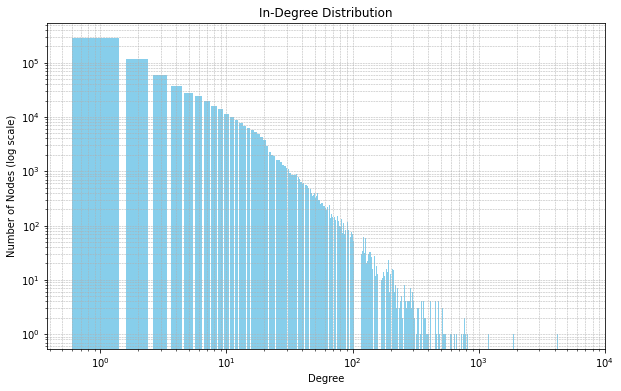

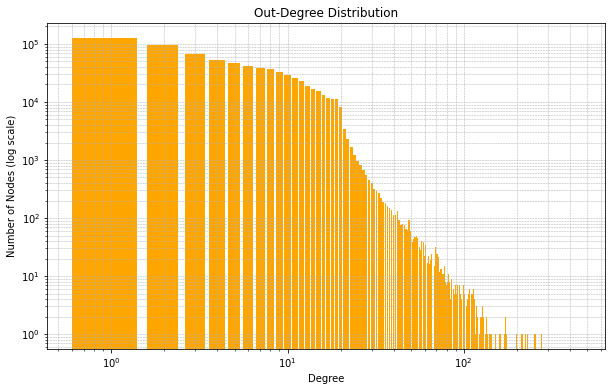

In [34]:
filename = 'web-Google.txt'
adj_list, reverse_adj_list = load_directed_graph(filename)
plot_in_degree_distribution(adj_list, reverse_adj_list)
plot_out_degree_distribution(adj_list, reverse_adj_list)